# Optimizing Delivery Logistics: Impact of Distance, Mode, Traffic, and Weather on delivery times

## Introduction

The food delivery market has undergone a radical transformation by the development of crowdsourcing platforms such as Uber Eats, DoorDash, and Grubhub. Leveraging wide networks of independent driver-partners, this model has massively expanded consumer access and changed the service entirely.

This convenience, however, has sparked an ultra-competitive marketplace in which logistical efficiency and speed are the ultimate currency. Shorter delivery times, therefore, are a prerequisite as they have a direct impact on customer satisfaction, loyalty, and positive reviews for the platforms. Economically, better efficiency means more cusotmer loylty and increased earnings on the part of driver-partners, along with cost minimization for the platforms. On the other hand, delayed deliveries translate to customer churn, degradation of food served, and financial losses, making route and resource optimization key from a business perspective.

This analysis looks to go beyond general assumptions about operations and quantify the specific factors that affect the delivery duration. It thus investigates the central question: What are the main drivers of Food Delivery Time, and precisely, how do the interaction of operational variables, like delivery mode/vehicle type, with external environmental variables, such as traffic and weather conditions, together affect the average delivery time? 

For this project, I used the Food Delivery Route dataset from [Kaggle](https://www.kaggle.com/datasets/prince7489/food-delivery-route-efficiency-dataset?resource=download)


## Methods

### Data Collection

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np


In [3]:
data = pd.read_csv('Food_Delivery_Route_Efficiency_Dataset.csv')
data

,order_id,distance_km,delivery_time_min,traffic_level,route_length_km,delivery_mode,weather,order_time,restaurant_zone,customer_zone
0,1,7.97,63.8,High,9.75,Bicycle,Clear,2025-01-01 15:29,South,North
1,2,0.90,7.6,High,1.28,Car,Cloudy,2025-01-03 00:47,West,North
2,3,11.12,78.0,Medium,16.65,Bike,Rainy,2025-01-04 17:32,South,Central
3,4,4.90,24.8,Low,5.25,Scooter,Rainy,2025-01-01 14:12,Central,Central
4,5,10.04,56.0,High,11.34,Car,Rainy,2025-01-02 16:50,West,North
...,...,...,...,...,...,...,...,...,...,...
195,196,9.02,38.4,Low,9.57,Bike,Cloudy,2025-01-03 09:22,Central,South
196,197,6.73,59.2,Low,10.04,Bike,Cloudy,2025-01-03 03:32,South,South
197,198,6.98,51.4,High,7.83,Scooter,Cloudy,2025-01-01 08:03,Central,West
198,199,3.80,29.2,Medium,5.34,Bicycle,Rainy,2025-01-04 07:34,South,North


### Data Cleaning

To improve readability and maintain consistency across the dataset, all column names were standardized using proper title case formatting and with spaces replacing underscores.

In [4]:
data.columns = data.columns.str.replace('_', ' ')
data.columns = data.columns.str.title()

The OrderTime column was converted from string format to proper datetime objects to enable time-based analysis and operations.

In [5]:
data['Order Time'] = pd.to_datetime(data['Order Time'])

Now the columns are easily readable and the order times are in the proper format.

In [6]:
data.head()

,Order Id,Distance Km,Delivery Time Min,Traffic Level,Route Length Km,Delivery Mode,Weather,Order Time,Restaurant Zone,Customer Zone
0,1,7.97,63.8,High,9.75,Bicycle,Clear,2025-01-01 15:29:00,South,North
1,2,0.90,7.6,High,1.28,Car,Cloudy,2025-01-03 00:47:00,West,North
2,3,11.12,78.0,Medium,16.65,Bike,Rainy,2025-01-04 17:32:00,South,Central
3,4,4.90,24.8,Low,5.25,Scooter,Rainy,2025-01-01 14:12:00,Central,Central
4,5,10.04,56.0,High,11.34,Car,Rainy,2025-01-02 16:50:00,West,North


## EDA (Exploratory Data Analysis)

In my EDA I explored: 

**Dataset Structure**: Determined the overall size of the data and listed all column names.

**Numerical Variables**: Generated basic statistical summaries for all numeric columns.

**Data Quality** (Missing Values): Calculated and displayed the percentage of missing values for every column, none was found.

**Categorical Variables**: Identified categorical columns and analyzed their distribution by determining:
- The number of unique values.
- The frequency distribution (value counts) of each category.

In [7]:
print(f"Dataset Shape: {data.shape}")

print("\nColumn Names:")
print(data.columns.tolist())

print("\nBasic Statistics:")
data.describe()

Dataset Shape: (200, 10)

Column Names:
['Order Id', 'Distance Km', 'Delivery Time Min', 'Traffic Level', 'Route Length Km', 'Delivery Mode', 'Weather', 'Order Time', 'Restaurant Zone', 'Customer Zone']

Basic Statistics:


,Order Id,Distance Km,Delivery Time Min,Route Length Km,Order Time
count,200.000000,200.000000,200.000000,200.000000,200
mean,100.500000,6.624750,44.744500,8.155850,2025-01-03 03:02:54.899999744
min,1.000000,0.530000,2.400000,0.580000,2025-01-01 08:03:00
25%,50.750000,3.687500,23.725000,4.420000,2025-01-02 08:03:45
50%,100.500000,6.845000,44.650000,8.520000,2025-01-03 02:53:00
75%,150.250000,9.797500,63.900000,11.800000,2025-01-03 23:20:15
max,200.000000,12.000000,108.800000,17.290000,2025-01-04 18:58:00
std,57.879185,3.371918,25.083925,4.303207,NaN


In [8]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(f"Categorical variables: {list(categorical_cols)}")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {data[col].nunique()}")
    print("Value counts:")
    print(data[col].value_counts())

Categorical variables: ['Traffic Level', 'Delivery Mode', 'Weather', 'Restaurant Zone', 'Customer Zone']

--- Traffic Level ---
Unique values: 3
Value counts:
Traffic Level
High      68
Medium    67
Low       65
Name: count, dtype: int64

--- Delivery Mode ---
Unique values: 4
Value counts:
Delivery Mode
Bicycle    52
Scooter    52
Bike       49
Car        47
Name: count, dtype: int64

--- Weather ---
Unique values: 4
Value counts:
Weather
Cloudy    55
Rainy     55
Windy     50
Clear     40
Name: count, dtype: int64

--- Restaurant Zone ---
Unique values: 5
Value counts:
Restaurant Zone
South      54
Central    47
West       41
North      30
East       28
Name: count, dtype: int64

--- Customer Zone ---
Unique values: 5
Value counts:
Customer Zone
North      46
East       45
Central    38
South      36
West       35
Name: count, dtype: int64


In [9]:
missing_count = data.isnull().sum()

print("\nMissing Data Percentage by Column:")
print("=" * 40)
missing_pct = (data.isnull().sum() / len(data)) * 100
print(missing_pct[missing_pct > 0])

if missing_pct.sum() == 0:
    print("No values missing")


Missing Data Percentage by Column:
Series([], dtype: float64)
No values missing


## Analyses

### Distributions

#### Distribution of Delivery Times

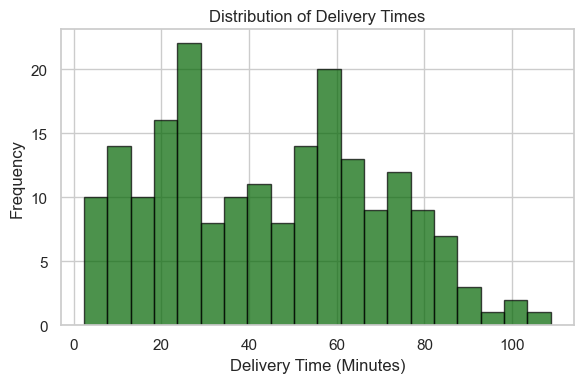

In [10]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)

fig, ax = plt.subplots()
ax.hist(data['Delivery Time Min'], bins=20, color='darkgreen', alpha=0.7, edgecolor='black')
ax.set_xlabel('Delivery Time (Minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Delivery Times')

plt.tight_layout()
plt.show()

The graph shows a bimodal distribution. The highest frequency is for delivery times around 30 minutes, and the second highest peak is around 60 minutes. The frequencies are significantly lower for times between 35 and 55 minutes, and for times over 75 minutes.

#### Distribution of Delivery Distances

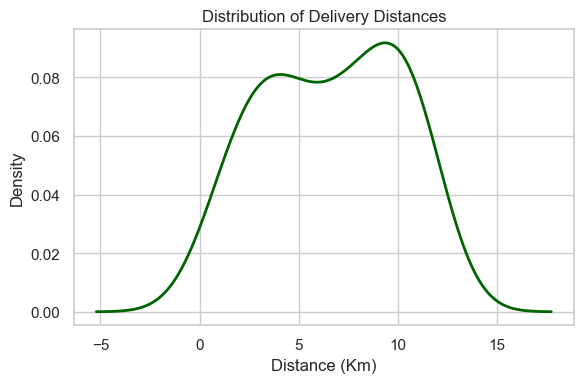

In [11]:
fig, ax = plt.subplots()
data['Distance Km'].plot.kde(ax=ax, color='darkgreen', linewidth=2, bw_method=0.5)
ax.set_xlabel('Distance (Km)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Delivery Distances')

plt.tight_layout()
plt.show()

The density plot reveals a broad and relatively uniform distribution of trip distances, indicating no single distance is predominant.

#### Distributions of Traffic Conditions and Delivery Modes

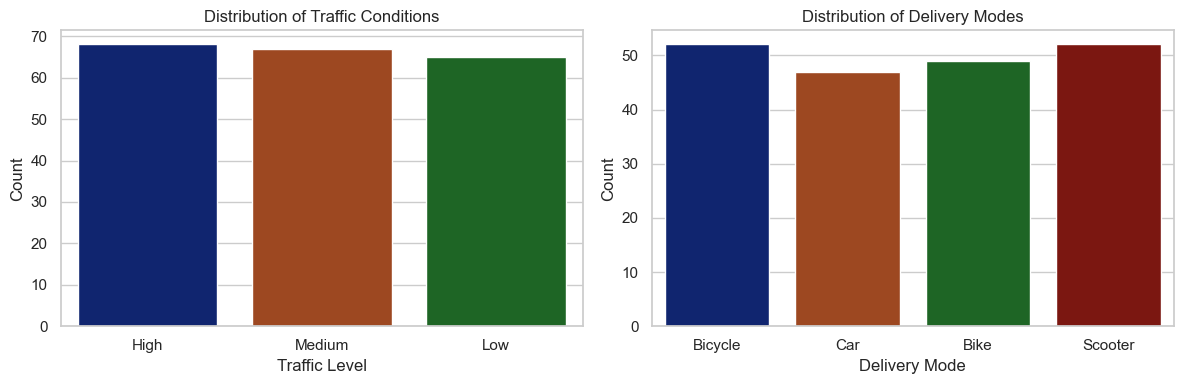

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Traffic Level', data=data, ax=ax1, hue='Traffic Level', palette='dark', legend=False)
ax1.set_xlabel('Traffic Level')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Traffic Conditions')

sns.countplot(x='Delivery Mode', data=data, ax=ax2, hue='Delivery Mode', palette='dark', legend=False)
ax2.set_xlabel('Delivery Mode')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Delivery Modes')

plt.tight_layout()
plt.show()

The traffic level distribution is nearly uniform, with counts for High, Medium, and Low traffic being very similar.
The distribution of delivery modes is also fairly even across all four categories. Bicycle and Scooter are the most frequently used modes, while Car is the least frequent

### Visualizations

#### Visualization 1: Average Delivery Time by Distance

In [13]:

sns.set_theme(context="notebook", style="whitegrid", palette="dark")
plt.rcParams['figure.figsize'] = (10, 6)

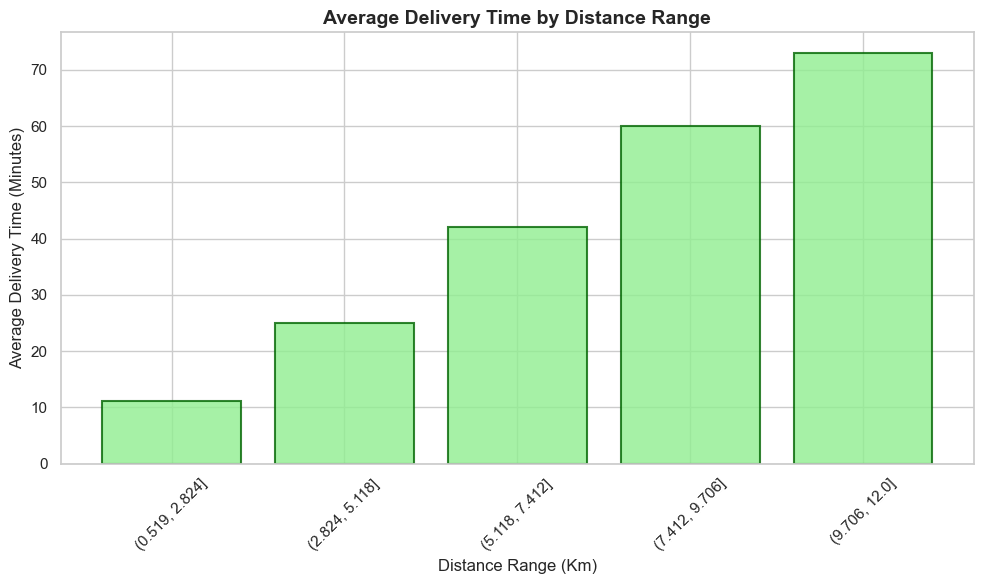

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

distance_bins = pd.cut(data['Distance Km'], bins=5)
distance_means = data.groupby(distance_bins, observed=False)['Delivery Time Min'].mean()

bars = ax.bar([str(x) for x in distance_means.index], distance_means.values, 
              color='lightgreen', alpha=0.8, edgecolor='darkgreen', linewidth=1.5)
ax.set_xlabel('Distance Range (Km)', fontsize=12)
ax.set_ylabel('Average Delivery Time (Minutes)', fontsize=12)
ax.set_title('Average Delivery Time by Distance Range', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Delivery time increases linearly and proportionally with distance, escalating from an average of 11.1 minutes for the shortest trips to a maximum of 73.0 minutes for the longest trips.

#### Visualization 2 (Single Grouping): Delivery Time by Mode 

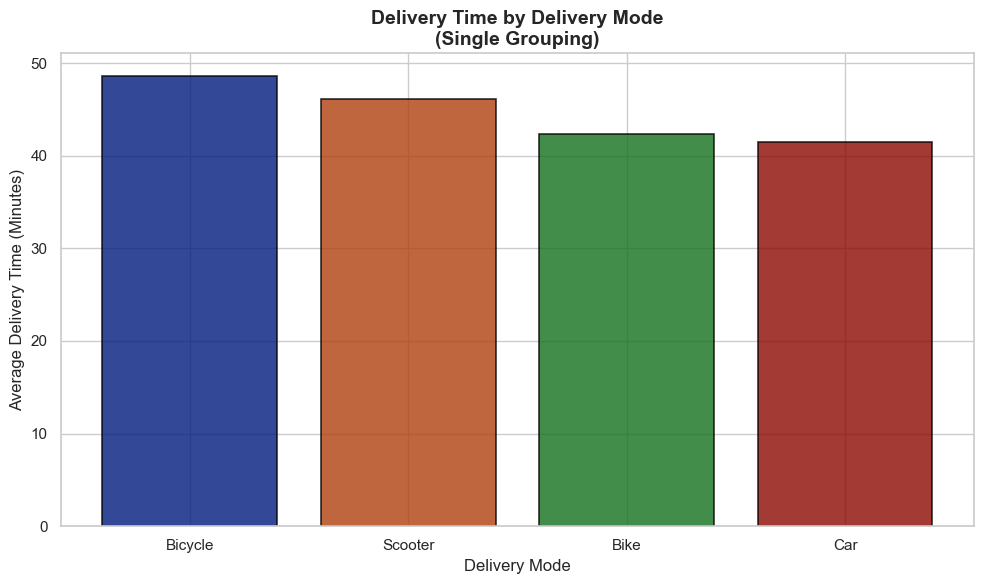

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
mode_stats = data.groupby('Delivery Mode')['Delivery Time Min'].mean().sort_values(ascending=False)

colors = sns.color_palette("dark", len(mode_stats))
bars = ax.bar(mode_stats.index, mode_stats.values, 
              color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)

ax.set_xlabel('Delivery Mode', fontsize=12)
ax.set_ylabel('Average Delivery Time (Minutes)', fontsize=12)
ax.set_title('Delivery Time by Delivery Mode\n(Single Grouping)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

The graph conveys that average delivery time varies by mode, with Car being the fastest at 41.5 minutes and Bicycle being the slowest at 48.6 minutes. Scooter and Bike fall in the middle range.

#### Visualization 3 (Multi-key Grouping): Mode x Weather

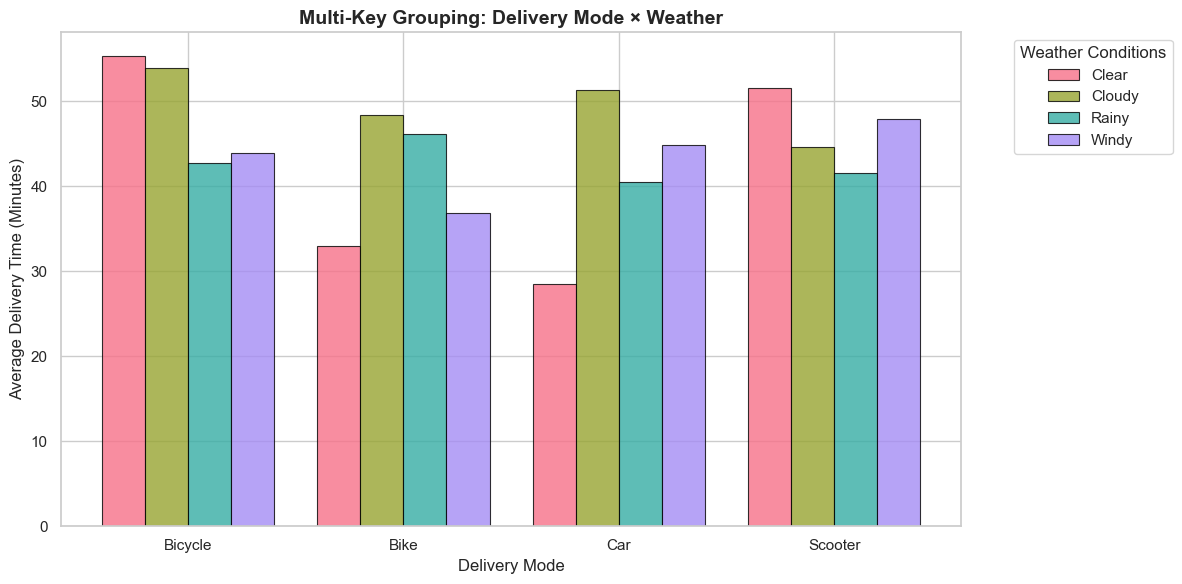

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

multi_group = data.groupby(['Delivery Mode', 'Weather'])['Delivery Time Min'].mean().unstack()

x = np.arange(len(multi_group.index))
width = 0.2  
colors = sns.color_palette("husl", len(multi_group.columns))

for i, (weather, values) in enumerate(multi_group.items()):
    ax.bar(x + i * width, values, width, 
           label=weather, color=colors[i], alpha=0.8, edgecolor='black', linewidth=0.8)

ax.set_xlabel('Delivery Mode', fontsize=12)
ax.set_ylabel('Average Delivery Time (Minutes)', fontsize=12)
ax.set_title('Multi-Key Grouping: Delivery Mode × Weather', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(multi_group.columns)-1)/2)
ax.set_xticklabels(multi_group.index)
ax.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

It is clear that Car deliveries are fastest overall, achieving their minimum average time of 28.6 minutes in clear weather. Delivery times for all modes are generally longest in Cloudy and Windy conditions, particularly for Bicycle and Scooter.

#### Visualization 4: Delivery Time Distribution by Mode

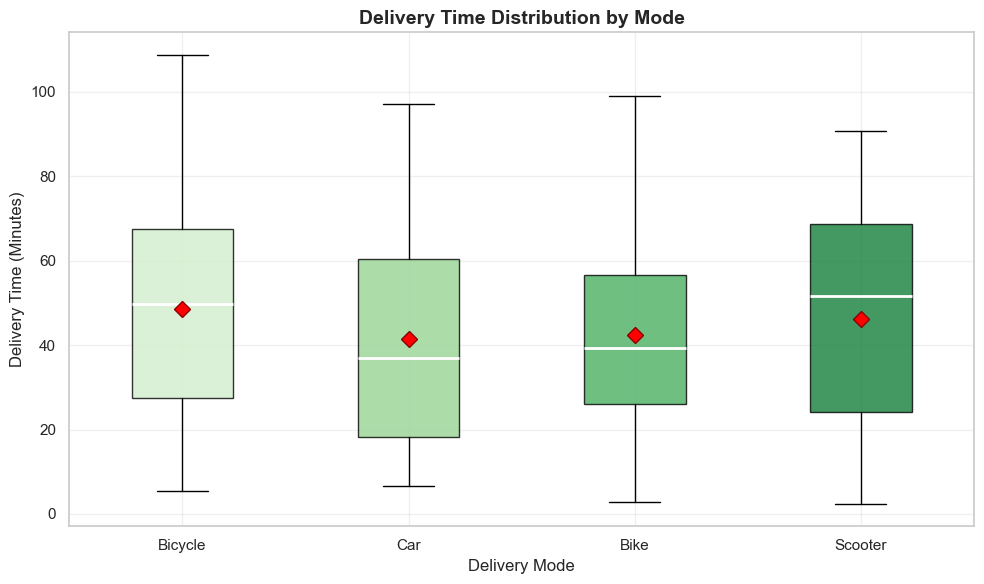

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

delivery_times_by_mode = [data[data['Delivery Mode'] == mode]['Delivery Time Min'] 
                         for mode in data['Delivery Mode'].unique()]

box_plot = ax.boxplot(delivery_times_by_mode, 
                     labels=data['Delivery Mode'].unique(),
                     patch_artist=True,
                     showmeans=True,
                     meanprops={"marker":"D", "markerfacecolor":"red", "markeredgecolor":"darkred", "markersize":8},
                     medianprops={"color":"white", "linewidth":2},
                     flierprops={"marker":"o", "markerfacecolor":"red", "markersize":5, "alpha":0.5})

colors = sns.color_palette("Greens", len(delivery_times_by_mode))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

ax.set_xlabel('Delivery Mode', fontsize=12)
ax.set_ylabel('Delivery Time (Minutes)', fontsize=12)
ax.set_title('Delivery Time Distribution by Mode', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The Car delivery mode shows the tightest distribution and lowest median time (approx. 40 minutes), indicating it is the most reliable and fastest mode. Bicycle and Scooter have the widest distribution and highest median times (approx. 47 minutes), suggesting greater variability and longer average trips.

## Linear Regression Extension 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Select your features and target
# We use features you identified as important in your EDA: Distance, Traffic, and Mode
features = ['Distance Km', 'Traffic Level', 'Delivery Mode', 'Weather']
X = data[features]
y = data['Delivery Time Min']

# 2. Convert categorical variables to dummy variables (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# 3. Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 4. Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

Mean Squared Error: 81.33
R-squared Score: 0.85


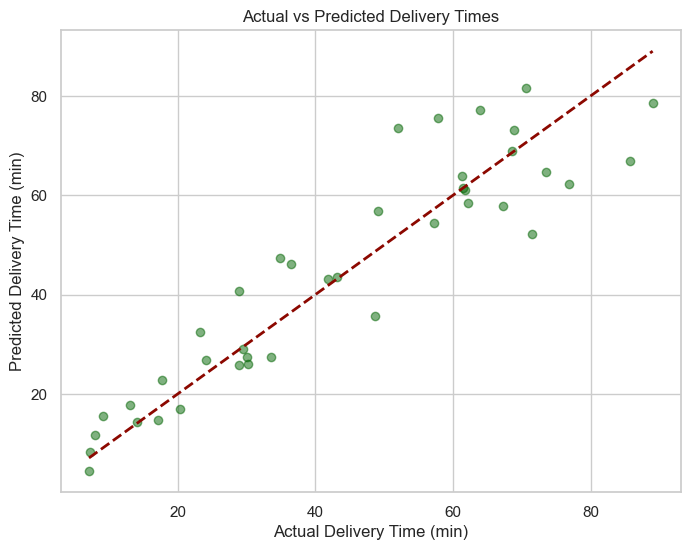

In [20]:
# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# 7. Visualize Predictions vs. Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Delivery Time (min)')
plt.ylabel('Predicted Delivery Time (min)')
plt.title('Actual vs Predicted Delivery Times')
plt.show()

In [21]:
# Get the importance of each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

                       Coefficient
Distance Km               7.009744
Traffic Level_Medium      2.981287
Traffic Level_Low         2.857285
Weather_Rainy             1.195437
Weather_Windy             0.896524
Delivery Mode_Scooter     0.624969
Delivery Mode_Car         0.421130
Weather_Cloudy           -0.271254
Delivery Mode_Bike       -1.092974


## Discussion

The Secret to Food Delivery Logistics Efficiency

This analysis goes beyond assumptions to identify exactly what drives delivery speed in the on-demand food economy. The insights provide a data-driven roadmap to help platforms, restaurants, and drivers optimize operations, reduce costs, and improve customer satisfaction.

1. The Unavoidable Geography: 

The findings explain the most basic rule of delivery: distance is the leading determinant of delivery time. Indeed, there was a strong near-linear relationship with delivery times escalating rapidly from just about 11 minutes for orders at short distances of 0.5–2.8 km to 73 minutes for journeys of the longest lengths, 9.7–12.0 km.

Real-World Application: This finding is so critical for operational planning. Delivery platforms can use this relationship to:

Introduce Dynamic Pricing: Precisely calculate and accordingly adjust the delivery fees based on the exact distance.

Optimize Delivery Zones: achieve a balance between customer reach and delivery efficiency by either limiting or premium-pricing orders beyond a certain distance threshold.

2. The Two Service Tiers: 

Most revealing perhaps is the discovery of a bimodal distribution in delivery times. Rather than exhibiting only a single "typical" delivery, the service seems to operate in two distinct modes: a primary cluster around 30 minutes and a secondary cluster at 60 minutes.

That is a real-world application because it suggests that there's a case of two different service scenarios. For companies this implies that they should: 

Develop tiered service levels: offer an "Express" service for local orders and a "Standard" service for longer ones, with appropriate pricing and promise times for each.

Refine Driver Incentives: Structure the bonuses or incentives differently for drivers who efficiently handle the challenging and long-distance orders versus those who excel in completing multiple short-distance trips.

3. The Vehicle Advantage:

The performance breakdown by delivery mode shows that the choice of vehicle is a strategic lever. Although all modes are used, their performance varies drastically.

Car: Undisputed in terms of reliability and speed. Low variability, consistent performance under all conditions, makes it the most efficient choice, especially for greater distances and poor weather.

Bike: Strong and balanced performance; a good compromise between speed and agility, and fit for dense cities with traffic congestion.

Scooter & Bicycle: High volatility and longer average times were observed for these modes. With presumably lower operational costs, this would indicate their best use is within short distances, non-time-sensitive deliveries, and in ideal conditions.

#### Practical Application:

**Smart recommendation of vehicle types**: the platform can recommend the best vehicle type to driver-partners depending on the distance for a particular order and current weather in real time.

**Driver Investment**: This information helps drivers deciding on vehicle upgrades to clearly see the long-term time-saving benefits of investment in a car compared to a bike.

**Fleet Management**: In platforms that manage their own fleet, this argues for a fleet composition weighted in favor of cars and bikes for reliability.

 **Predictive Surge Pricing**: Now platforms will be able to offer surge pricing during high-traffic and inclement weather conditions more precisely, keeping in mind the demand and expected slowing down of their delivery timelines.

 **Proactive Alerts**: Bicycle or scooter drivers would get alerted in the case of worsening weather conditions so that they can log off or be routed to shorter, safer deliveries. 

 Ultimately, while distance sets the delivery timeline, the vehicle used dictates its efficiency. To improve performance for customers and drivers, platforms must move beyond simply assigning the nearest driver. Platforms must intelligently match orders to the most suitable vehicle based on distance, traffic, and weather.

## GenAI Disclosure

I used an LLM, ChatGPT, for certain technical and conceptual tasks in this assignment. Below is a detailed account of the usage, following the guidelines laid down for the assignment.

1. Technical Code Assistance & Debugging

Prompt: "How to check for missing values in a dataset using pandas in a Jupyter notebook?"

Results & Verification: LLM suggested df.isnull().sum(), which I had run on my DataFrame and tested against the .info() method to verify that the counts were indeed correct for the missing values.

Prompt: "How to convert to datetime?"

Result & Verification: It gave me the syntax pd.to_datetime(). I then used that on my columns for 'Order Time' and 'Delivery Time' and verified the conversion was complete by checking dtype of new columns and pulling date parts via .dt.hour.

Prompt: "How do I include mean markers in a boxplot? How can I include a dotted line showing where the mean is at in my distribution bar graph?"

Result & Verification: The 'how to' for the boxplot suggested using showmeans=True in sns.boxplot(). The 'how to' for the histogram provided code for how to calculate the mean using np.mean() and plot a vertical line using plt.axvline(). I tested each of these on a small subset of my data first to make sure they worked like I wanted them to before implementing thsome of them into the final visualizations.

2. Styling for Modelling and Visualization

Usage: Throughout my modeling operation, that is, Pandas grouping, and also in the visualizations, I used LLM to make sure I got the proper syntax for more complex operations, and got the aesthetic result I wanted. This included, requests like "Change the plot aesthetics to improve clarity and presentation by making font sizes bigger/smaller, changing colours, figure size, marker style, etc." I'd describe what I want - "make the title larger," "use a dotted line," "change the palette to dark colours" - and LLM would help me fill in the appropriate parameter.

Fine-tuning visualization: I have used the LLM to investigate alternative color palettes, such as 'Set2', 'dark' to enhance visual contrast in my categorical plots, and also code to rotate x-axis labels by 45 degrees using ax.tick_params(axis='x', rotation=45) to enhance readability when labels were too long.

Testing: I always did incremental testing of the styling suggestions by making necessary adjustments to the code so that the final plots were visually effective and communicative of the data.

3. Conceptual Understanding

Prompt: "What is the purpose of converting to datetime? Why will it help with plotting and visualization moving forward?

Outcome & Interpretation: LLM said this format allows for the time-based analysis like hourly, daily, and monthly trends. I accepted this because it seemed to make logical sense based on the material we covered in the course regarding temporal data. Using the data from that step, I created plots on the delivery times by hour of the day, which was a key component of my exploratory analysis.

Prompt: "Should I change my data set to be all to 2 decimal places if one row is to one decimal place?"

Result & Action: Indeed, LLM explained that inconsistent decimal formatting in pandas does not affect the numerical calculations since they are stored in float64. So, I didn't perform any unnecessary formatting on the numerical columns.

4. Writing and Structuring Assistance

Prompt: "Give me a 150-300 word introduction to a data science assignment where you talk about my topic which is food delivery route efficiency. Include the following

brief history of the food delivery industry (emergence of uber eats, doordash, and other crowdsourcing apps)

importance of short delivery times and their economic implications

introduce the big question which my assignment will explore: "What are the primary determinants of Food Delivery Time, and specifically, how do operational factors like vehicle type and environmental factors like traffic and weather collectively impact the mean delivery duration?""

Result & Usage: The LLM-generated draft introduction covered the background of the industry, the economic implications of the topic, and stated the key research question. I did not use this text verbatim but took this as a structural template and completely rewrote the whole introduction in my words.

Prompt: I also used the LLM for help with writing my Discussion section, asking it to improve the flow and incorporate real-world applications of my findings.

Result & Usage: The LLM provided alternative phrasings and structural suggestions to make the conclusion more impactful. I used these ideas as inspiration, carefully rewriting and integrating them into my own analysis and wording to ensure the final discussion reflected my personal interpretation of the results.

5. Warning Resolution

Prompt: "How can I suppress the future warning 'Passing palette without assigning hue is deprecated.'?"

Result & Implementation: LLM gave the diagnosis and corrected syntax to include hue='Traffic Level' and legend=False. I tried that fix, and it removed the warning while generating the desired plot.

Declaration: I have critically evaluated all the suggestions given by the LLM. No complex model pipelines or long scripts (>15 lines) were used verbatim. Final interpretations, conclusions, and the great majority of the written content are mine. The use of AI was limited to the specific documented instances above.

## References

1. Source Data - https://www.kaggle.com/datasets/prince7489/food-delivery-route-efficiency-dataset?resource=download 